In [1]:
#Pavan kumar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#1
df=pd.read_excel("flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [13]:
#2
print(df.ndim)
print(df.shape)

2
(10683, 11)


<function matplotlib.pyplot.show(close=None, block=None)>

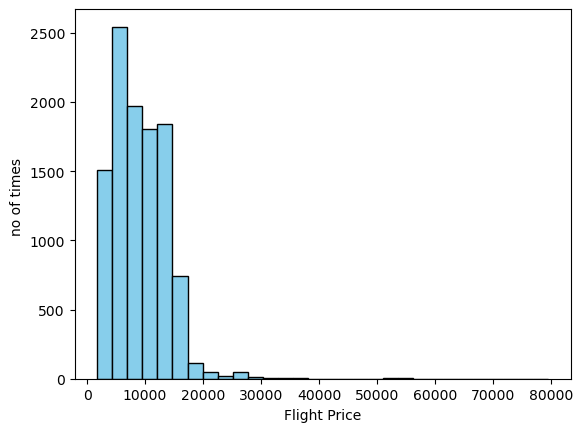

In [56]:
#3
plt.hist(df['Price'],bins=30, edgecolor='k', color='skyblue')
plt.xlabel('Flight Price')
plt.ylabel('no of times ')
plt.show

In [68]:
a=df.Price.max()
b=df.Price.min()
print(f'Min: {b},Max: {a},Range: {a-b}')

Min: 1759,Max: 79512,Range: 77753


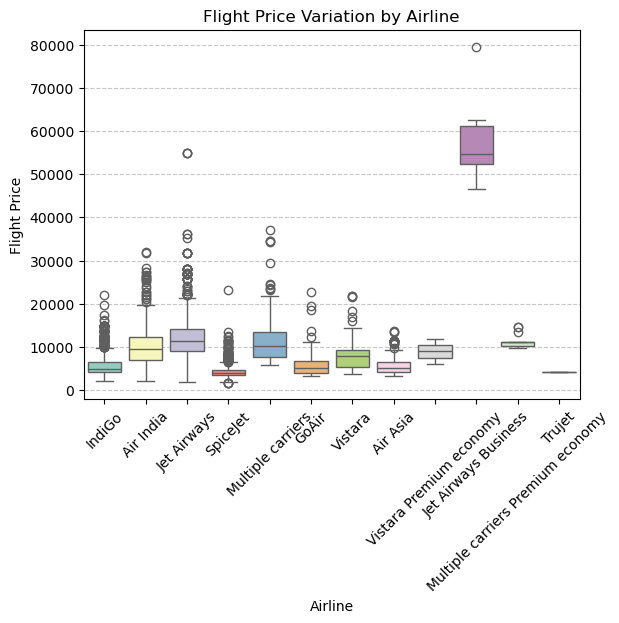

In [116]:
#4
sns.boxplot(data=df, x='Airline', y='Price', hue='Airline', palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.title('Flight Price Variation by Airline')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False) 
plt.show()

<Axes: >

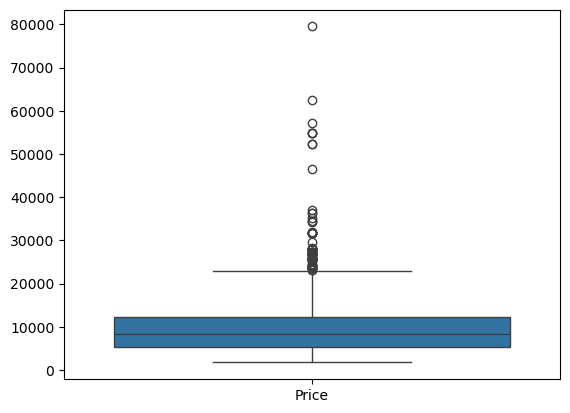

In [130]:
#5
sns.boxplot(df)

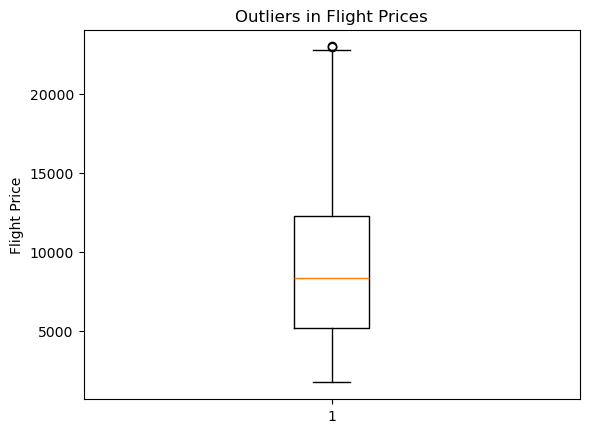

In [162]:

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df.Price > lower_bound) & (df.Price < upper_bound)]
ax=plt.boxplot(outliers.Price)
plt.ylabel('Flight Price')
plt.title('Outliers in Flight Prices')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x16e8b1b8740>,
 'caps': [<matplotlib.lines.Line2D at 0x16e8afa9c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e8b1b8890>],
 'medians': [<matplotlib.lines.Line2D at 0x16e8b194f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e8b196b70>],
 'means': []}

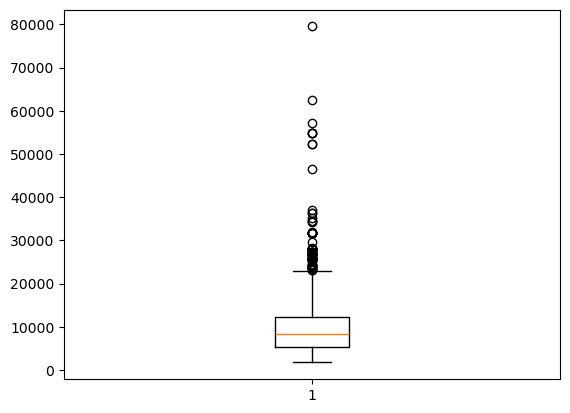

In [146]:
plt.boxplot(df.Price)

<function matplotlib.pyplot.show(close=None, block=None)>

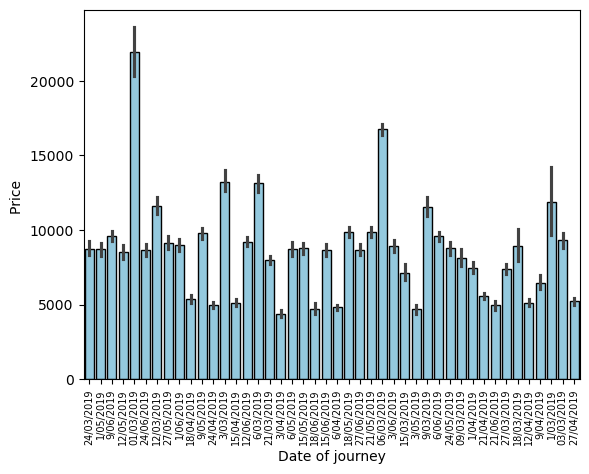

In [226]:
#6
sns.barplot(x='Date_of_Journey',y='Price',edgecolor='k', color='skyblue',data=df)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date of journey')
plt.ylabel('Price ')
plt.show

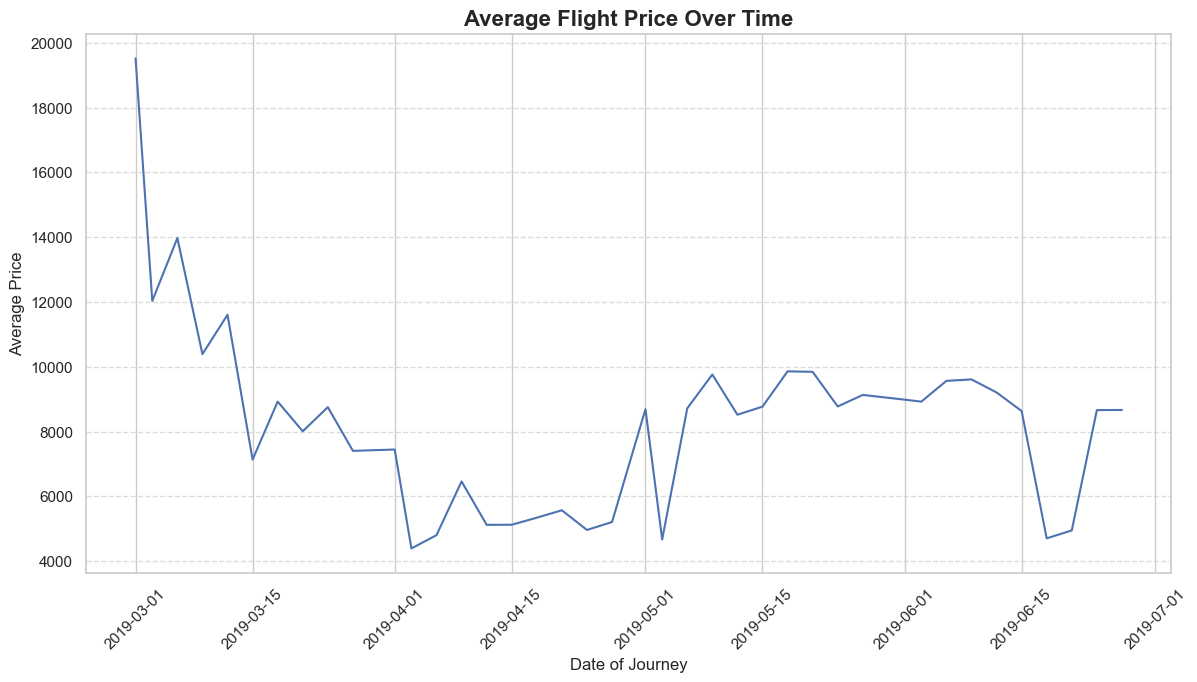

In [236]:
#7
# Data Preprocessing
# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
# Extract additional features
df['Day_of_Week'] = df['Date_of_Journey'].dt.day_name()
df['Month'] = df['Date_of_Journey'].dt.month_name()

# Calculate average price per airline
average_price_per_airline = df.groupby('Airline')['Price'].mean().reset_index()
# 1. Time Series Analysis: Line Chart of Flight Prices Over Time
plt.figure(figsize=(14, 7))
price_over_time = df.groupby('Date_of_Journey')['Price'].mean().reset_index()
sns.lineplot(data=price_over_time, x='Date_of_Journey', y='Price')
plt.title('Average Flight Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dataset Overview:
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  

Dataset Description:
              Price
count  10683.000000
mean    9087.064121

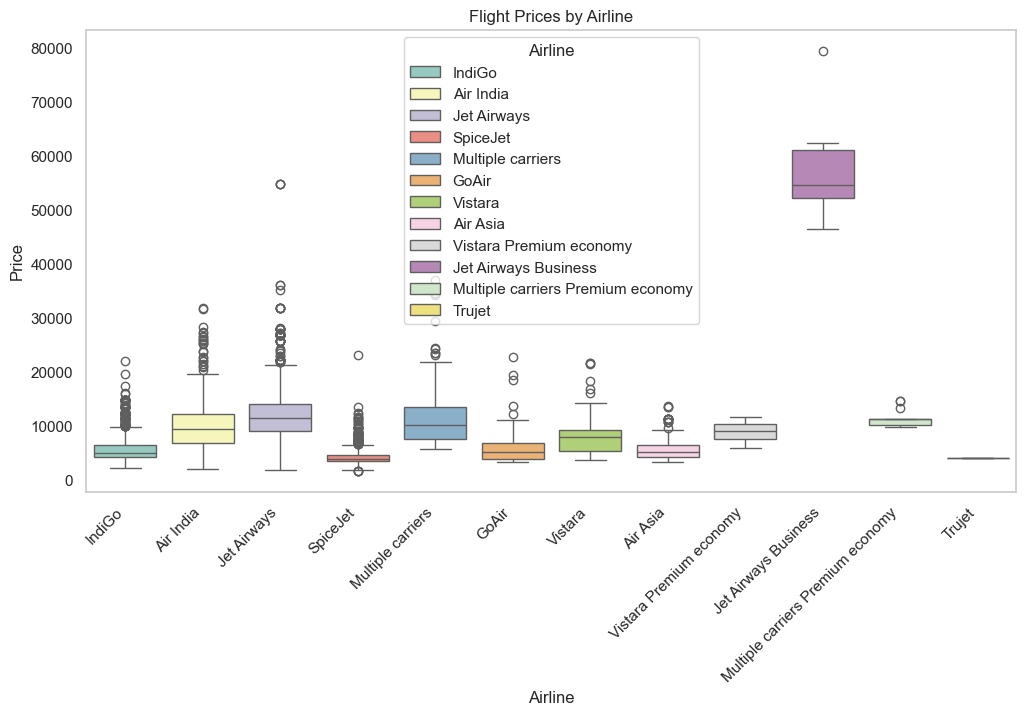

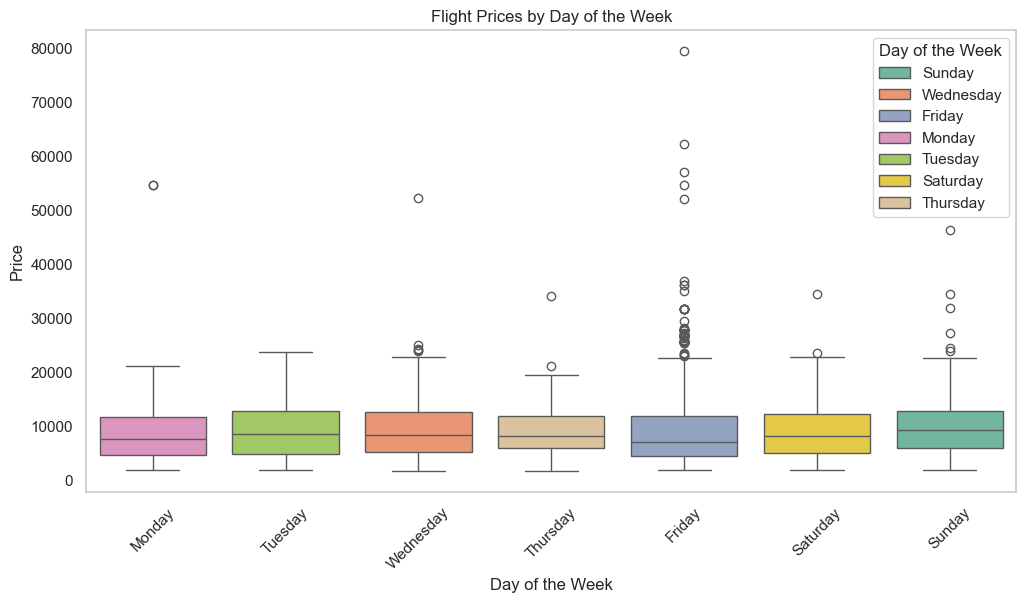

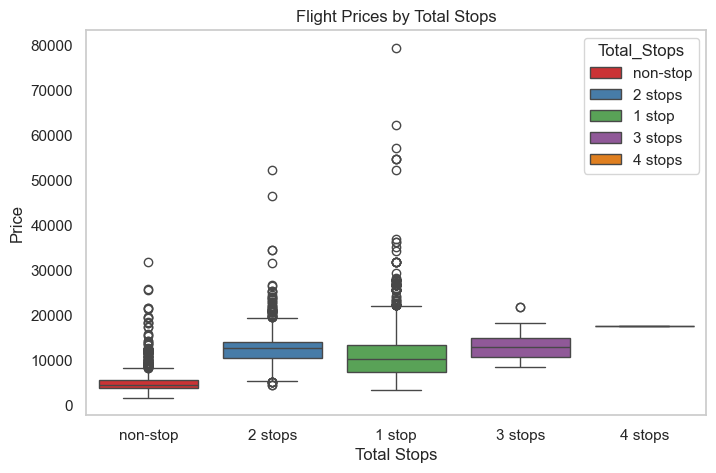

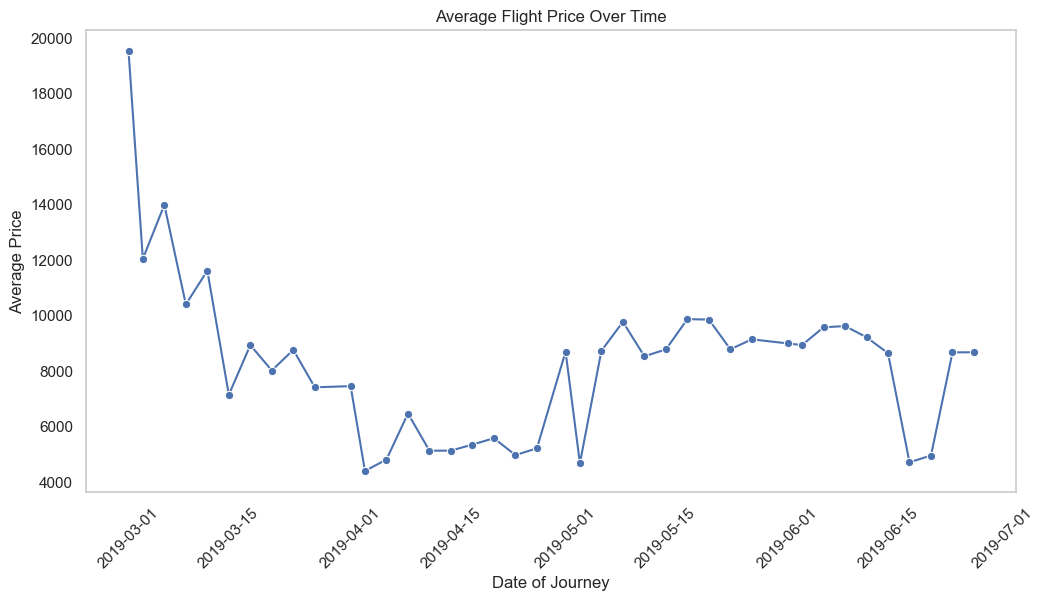

Key Insights:
- Airlines have varying price distributions.
- Prices differ based on the day of the week.
- Flights with more stops tend to be cheaper.
- Duration impacts price; longer flights are generally more expensive.


In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('flight_price.xlsx')


print("Dataset Overview:")
print(df.head())
print("\nDataset Description:")
print(df.describe())


df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')


df['Day_of_Week'] = df['Date_of_Journey'].dt.day_name()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Price', palette='Set3',hue='Airline',legend=True)
plt.xticks(rotation=45, ha='right')
plt.title('Flight Prices by Airline')
plt.ylabel('Price')
plt.xlabel('Airline')
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Day_of_Week', y='Price', hue='Day_of_Week', palette='Set2', 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],legend = True)  # Use dodge=True to separate the boxes for each hue
plt.xticks(rotation=45)
plt.title('Flight Prices by Day of the Week')
plt.ylabel('Price')
plt.xlabel('Day of the Week')
plt.grid(axis='y')
plt.legend(title='Day of the Week')  # Optional: add legend for clarity
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Total_Stops', y='Price', palette='Set1',hue='Total_Stops',legend=True)
plt.title('Flight Prices by Total Stops')
plt.ylabel('Price')
plt.xlabel('Total Stops')
plt.grid(axis='y')
plt.show()

price_trends = df.groupby('Date_of_Journey')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='Date_of_Journey', y='Price', marker='o')
plt.title('Average Flight Price Over Time')
plt.ylabel('Average Price')
plt.xlabel('Date of Journey')
plt.xticks(rotation=45)
plt.grid()
plt.show()

print("Key Insights:")
print("- Airlines have varying price distributions.")
print("- Prices differ based on the day of the week.")
print("- Flights with more stops tend to be cheaper.")
print("- Duration impacts price; longer flights are generally more expensive.")